In [1]:
from global_variable import *

In [2]:
data_rate=data_rate

In [3]:
data_rate

50

In [4]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt


In [5]:
class SensorNode():
    posX=0
    posY=0
    data_rate=data_rate
    transmission_range=transmission_range

    def __init__(self):
        self.posX
        self.posY
        self.data_rate
        self.transmission_range
    
    def get_pose_node(self):
        self.posX=random.randrange(500)
        self.posY=random.randrange(500)
        self.data_rate
        self.transmission_range
        return self.posX,self.posY

In [6]:
sensor=[]


In [7]:
number_of_sensor

20

In [8]:
for i in range(number_of_sensor):
    sensor.append(SensorNode().get_pose_node())

In [9]:
sensor=sorted(sensor)

In [10]:
import numpy as np

In [11]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions
            
    

        

In [12]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

In [13]:
pdp_positions

{0: (0.0, 0.0),
 1: (0.0, 282.842712474619),
 2: (282.842712474619, 0.0),
 3: (282.842712474619, 282.842712474619)}

In [14]:
G=nx.Graph()

In [15]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [16]:
adjacent_matrix=np.zeros((4,4))
for u in range(len(pdp_positions)):
    for v in range(len(pdp_positions)):
        wt=distance(pdp_positions,u,v)
        adjacent_matrix[u][v]=wt
        G.add_edge(u,v,weight=wt)
        #G.add_node()

In [17]:
adjacent_matrix

array([[  0.        , 282.84271247, 282.84271247, 400.        ],
       [282.84271247,   0.        , 400.        , 282.84271247],
       [282.84271247, 400.        ,   0.        , 282.84271247],
       [400.        , 282.84271247, 282.84271247,   0.        ]])

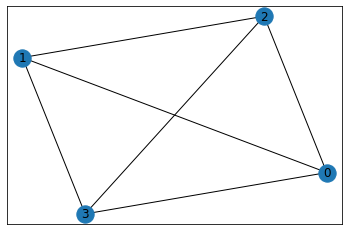

In [18]:
nx.draw_networkx(G)

In [19]:
labels = nx.get_edge_attributes(G,'weight')


In [20]:
pos=nx.get_node_attributes(G,'pos')


In [21]:
labels

{(0, 0): 0.0,
 (0, 1): 282.842712474619,
 (0, 2): 282.842712474619,
 (0, 3): 400.0,
 (1, 1): 0.0,
 (1, 2): 400.0,
 (1, 3): 282.842712474619,
 (2, 2): 0.0,
 (2, 3): 282.842712474619,
 (3, 3): 0.0}

In [22]:
G.number_of_nodes()

4

In [23]:
import matplotlib.pyplot as plt


#to visualize how the points are scattered on the graph blue represents the pdps and red represents the sensor points

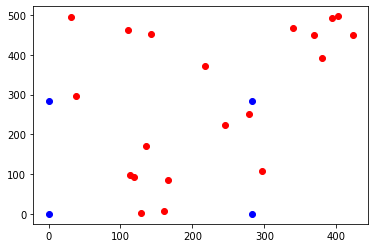

In [24]:

for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')

The below three lines of codes are just used to store value of the sensor data in a external file

In [25]:
#the below three lines of codes are 
import os
import ast
import math

In [28]:
save_file = 'newfile.txt.'


In [29]:
with open(save_file, 'w') as f:
    f.write(str(random_sensor_values))

#A new graph is created below ,firstly the sensor nodes are added 

In [27]:
K=nx.Graph()

In [28]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

Now after the nodes are added then the edge between the nodes are added

In [29]:
for i in range(len(sensor)):
    for j in range(len(sensor)):
        K.add_edge("sensor{}".format(i),"sensor{}".format(j))

In [30]:
#this function is getting the the coordinate points of sensor and Graph as the argument value
#
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                if euclidean_distance<=transmission_range:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1
                    
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance),(edge_weight)
                else:
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance)
            k=k+1
    return distance_sensors,M

here the 'L' is a graph containing the sensor nodes and edge weights

In [31]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [32]:
euclidean_distance_between_sensor

{1: (((31, 495), (38, 297)), 198.12369873389704, 1),
 2: (((31, 495), (111, 463)), 86.16263691415206, 1),
 3: (((31, 495), (113, 98)), 405.3800685776251),
 4: (((31, 495), (119, 93)), 411.5191368575707),
 5: (((31, 495), (129, 2)), 502.6459986909276),
 6: (((31, 495), (135, 171)), 340.28223579846184),
 7: (((31, 495), (143, 452)), 119.97082978791136, 1),
 8: (((31, 495), (161, 7)), 505.01881153081814),
 9: (((31, 495), (166, 85)), 431.65379646193315),
 10: (((31, 495), (217, 372)), 222.9910312097776),
 11: (((31, 495), (245, 224)), 345.3071096864355),
 12: (((31, 495), (278, 250)), 347.89941074971654),
 13: (((31, 495), (296, 107)), 469.8606176303777),
 14: (((31, 495), (340, 467)), 310.26601489689455),
 15: (((31, 495), (369, 449)), 341.11581610942636),
 16: (((31, 495), (380, 392)), 363.8818489564985),
 17: (((31, 495), (394, 493)), 363.00550960006103),
 18: (((31, 495), (402, 497)), 371.0053907964142),
 19: (((31, 495), (423, 450)), 394.5744543175597),
 20: (((38, 297), (31, 495)), 

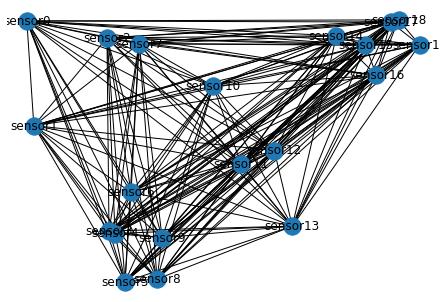

In [33]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

In [34]:
for i in range(len(pdp_positions)):
    L.add_node('pdp{}'.format(i),pos=pdp_positions[i])

In [35]:
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        L.add_edge("pdp{}".format(i),"sensor{}".format(j))

In [36]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)    

In [37]:
def calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor),(weight)
            else:
                 distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor)
            k=k+1
    return distance_pdp_each_sensor,J
            
            
            

In [38]:
distance_between_pdp_to_each_sensor,N=calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,L)

In [39]:
distance_between_pdp_to_each_sensor

{0: (((0.0, 0.0), (31, 495)), 495.96975714250965),
 1: (((0.0, 0.0), (38, 297)), 299.42110814035806),
 2: (((0.0, 0.0), (111, 463)), 476.11973284038544),
 3: (((0.0, 0.0), (113, 98)), 149.57606760441325, 1),
 4: (((0.0, 0.0), (119, 93)), 151.02979838429235, 1),
 5: (((0.0, 0.0), (129, 2)), 129.0155029444136, 1),
 6: (((0.0, 0.0), (135, 171)), 217.86693186438367),
 7: (((0.0, 0.0), (143, 452)), 474.0812166707304),
 8: (((0.0, 0.0), (161, 7)), 161.15210206509875, 1),
 9: (((0.0, 0.0), (166, 85)), 186.49664876345634, 1),
 10: (((0.0, 0.0), (217, 372)), 430.66576367294397),
 11: (((0.0, 0.0), (245, 224)), 331.96535963862254),
 12: (((0.0, 0.0), (278, 250)), 373.8769851167627),
 13: (((0.0, 0.0), (296, 107)), 314.74592928265173),
 14: (((0.0, 0.0), (340, 467)), 577.658203438677),
 15: (((0.0, 0.0), (369, 449)), 581.172951882656),
 16: (((0.0, 0.0), (380, 392)), 545.9523788756671),
 17: (((0.0, 0.0), (394, 493)), 631.0982490864635),
 18: (((0.0, 0.0), (402, 497)), 639.2284411695086),
 19: ((

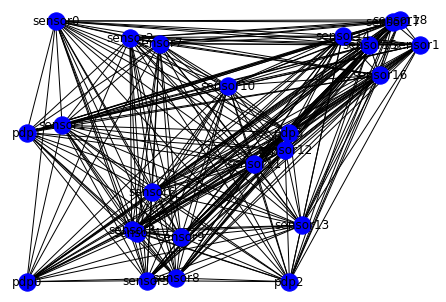

In [41]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color='b')

In [42]:
nx.get_node_attributes(N, 'pos')

{'sensor0': (31, 495),
 'sensor1': (38, 297),
 'sensor2': (111, 463),
 'sensor3': (113, 98),
 'sensor4': (119, 93),
 'sensor5': (129, 2),
 'sensor6': (135, 171),
 'sensor7': (143, 452),
 'sensor8': (161, 7),
 'sensor9': (166, 85),
 'sensor10': (217, 372),
 'sensor11': (245, 224),
 'sensor12': (278, 250),
 'sensor13': (296, 107),
 'sensor14': (340, 467),
 'sensor15': (369, 449),
 'sensor16': (380, 392),
 'sensor17': (394, 493),
 'sensor18': (402, 497),
 'sensor19': (423, 450),
 'pdp0': (0.0, 0.0),
 'pdp1': (0.0, 282.842712474619),
 'pdp2': (282.842712474619, 0.0),
 'pdp3': (282.842712474619, 282.842712474619)}

In [43]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [44]:
N.edges.data()

EdgeDataView([('sensor0', 'sensor0', {}), ('sensor0', 'sensor1', {'weight': 1}), ('sensor0', 'sensor2', {'weight': 1}), ('sensor0', 'sensor3', {}), ('sensor0', 'sensor4', {}), ('sensor0', 'sensor5', {}), ('sensor0', 'sensor6', {}), ('sensor0', 'sensor7', {'weight': 1}), ('sensor0', 'sensor8', {}), ('sensor0', 'sensor9', {}), ('sensor0', 'sensor10', {}), ('sensor0', 'sensor11', {}), ('sensor0', 'sensor12', {}), ('sensor0', 'sensor13', {}), ('sensor0', 'sensor14', {}), ('sensor0', 'sensor15', {}), ('sensor0', 'sensor16', {}), ('sensor0', 'sensor17', {}), ('sensor0', 'sensor18', {}), ('sensor0', 'sensor19', {}), ('sensor0', 'pdp0', {}), ('sensor0', 'pdp1', {}), ('sensor0', 'pdp2', {}), ('sensor0', 'pdp3', {}), ('sensor1', 'sensor1', {}), ('sensor1', 'sensor2', {'weight': 1}), ('sensor1', 'sensor3', {}), ('sensor1', 'sensor4', {}), ('sensor1', 'sensor5', {}), ('sensor1', 'sensor6', {'weight': 1}), ('sensor1', 'sensor7', {'weight': 1}), ('sensor1', 'sensor8', {}), ('sensor1', 'sensor9', {})

In [45]:
nx.get_edge_attributes(N,"weight")

{('sensor0', 'sensor1'): 1,
 ('sensor0', 'sensor2'): 1,
 ('sensor0', 'sensor7'): 1,
 ('sensor1', 'sensor2'): 1,
 ('sensor1', 'sensor6'): 1,
 ('sensor1', 'sensor7'): 1,
 ('sensor1', 'sensor10'): 1,
 ('sensor1', 'pdp1'): 1,
 ('sensor2', 'sensor7'): 1,
 ('sensor2', 'sensor10'): 1,
 ('sensor3', 'sensor4'): 1,
 ('sensor3', 'sensor5'): 1,
 ('sensor3', 'sensor6'): 1,
 ('sensor3', 'sensor8'): 1,
 ('sensor3', 'sensor9'): 1,
 ('sensor3', 'sensor11'): 1,
 ('sensor3', 'sensor13'): 1,
 ('sensor3', 'pdp0'): 1,
 ('sensor3', 'pdp2'): 1,
 ('sensor4', 'sensor5'): 1,
 ('sensor4', 'sensor6'): 1,
 ('sensor4', 'sensor8'): 1,
 ('sensor4', 'sensor9'): 1,
 ('sensor4', 'sensor11'): 1,
 ('sensor4', 'sensor13'): 1,
 ('sensor4', 'pdp0'): 1,
 ('sensor4', 'pdp2'): 1,
 ('sensor5', 'sensor6'): 1,
 ('sensor5', 'sensor8'): 1,
 ('sensor5', 'sensor9'): 1,
 ('sensor5', 'sensor13'): 1,
 ('sensor5', 'pdp0'): 1,
 ('sensor5', 'pdp2'): 1,
 ('sensor6', 'sensor8'): 1,
 ('sensor6', 'sensor9'): 1,
 ('sensor6', 'sensor11'): 1,
 ('se

In [48]:
k=0
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        shortest_path[k]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),weight='weight',method='dijkstra')
        k=k+1
        

In [49]:
shortest_path

{0: ['pdp0', 'sensor0'],
 1: ['pdp0', 'sensor1'],
 2: ['pdp0', 'sensor2'],
 3: ['pdp0', 'sensor3'],
 4: ['pdp0', 'sensor4'],
 5: ['pdp0', 'sensor5'],
 6: ['pdp0', 'sensor6'],
 7: ['pdp0', 'sensor7'],
 8: ['pdp0', 'sensor8'],
 9: ['pdp0', 'sensor9'],
 10: ['pdp0', 'sensor10'],
 11: ['pdp0', 'sensor11'],
 12: ['pdp0', 'sensor12'],
 13: ['pdp0', 'sensor13'],
 14: ['pdp0', 'sensor14'],
 15: ['pdp0', 'sensor15'],
 16: ['pdp0', 'sensor16'],
 17: ['pdp0', 'sensor17'],
 18: ['pdp0', 'sensor18'],
 19: ['pdp0', 'sensor19'],
 20: ['pdp1', 'sensor0'],
 21: ['pdp1', 'sensor1'],
 22: ['pdp1', 'sensor2'],
 23: ['pdp1', 'sensor3'],
 24: ['pdp1', 'sensor4'],
 25: ['pdp1', 'sensor5'],
 26: ['pdp1', 'sensor6'],
 27: ['pdp1', 'sensor7'],
 28: ['pdp1', 'sensor8'],
 29: ['pdp1', 'sensor9'],
 30: ['pdp1', 'sensor10'],
 31: ['pdp1', 'sensor11'],
 32: ['pdp1', 'sensor12'],
 33: ['pdp1', 'sensor13'],
 34: ['pdp1', 'sensor14'],
 35: ['pdp1', 'sensor15'],
 36: ['pdp1', 'sensor16'],
 37: ['pdp1', 'sensor17'],
 38:

In [137]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [138]:
pos_list=list(nx.get_node_attributes(N,'pos'))

In [141]:
pos_list[1][0]

's'